<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Project Topic: Investor Sentiment Index Modelling (Standardised)</h1>
<h3 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Author: JeffLin99, Email: jeffhengyu1999@hotmail.com</h3>

## Project Description:
### In this project, the goal is to find market sentiment proxies and construct a composite indicator of investor sentiment using principal component analysis

#### 1) Reading the csv of investor sentiment indicator variables
##### data source: China Stock Market & Accounting Research Database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Data\QX_ISI.csv')
df = df.set_index(['SgnMonth'])
df.index = pd.to_datetime(df.index)
df

# Implications of the data expression:
#     DCEF: Average discount rate of closed funds in the previous month
#     RIPO: Average IPO First Day Returns
#     NIPO: Number of IPOs
#     NA: Number of new accounts opened
#     TURN: Previous month's market turnover rate
#     CCI: Previous month's consumer confidence
#     ISI: Investor Sentiment Index
#     StdISI: Investor sentiment index (standardised)
#     StdExMacroISI: Investor sentiment index (standardised - excluding macroeconomic factors)

,DCEF,RIPO,NIPO,NA,TURN,CCI,ISI,StdISI,StdExMacroISI
SgnMonth,,,,,,,,,
2003-01-01,-0.1034,0.9050,5,3.97,0.1054,97.5,26.44,-1.15,-1.17
2003-02-01,-0.1117,0.7691,3,2.85,0.1928,97.7,25.30,-0.96,-0.95
2003-03-01,-0.0941,0.6831,6,3.26,0.1328,97.8,26.20,-1.14,-1.19
2003-04-01,-0.1399,1.1853,5,5.69,0.1218,97.6,27.69,-1.01,-0.95
2003-05-01,-0.1892,1.0623,2,4.21,0.3197,88.7,24.05,-0.72,-0.71
...,...,...,...,...,...,...,...,...,...
2022-04-01,0.0318,0.0832,36,41.89,0.2734,113.2,61.10,0.88,0.59
2022-05-01,-0.0143,0.4557,18,40.09,0.2525,86.7,49.93,0.01,-0.41
2022-06-01,-0.0475,0.5093,31,44.34,0.2417,86.8,55.64,0.13,-0.38


#### 2) Since these three variables in the data, DCEF, TURN, CCI, etc., are from the previous month, they are levelled to give the current month's data and the previous month's data is eliminated

In [2]:
df[['DCEF','TURN','CCI']] = df[['DCEF','TURN','CCI']].shift(-1)
df = df.iloc[:-1,:]
df

,DCEF,RIPO,NIPO,NA,TURN,CCI,ISI,StdISI,StdExMacroISI
SgnMonth,,,,,,,,,
2003-01-01,-0.1117,0.9050,5,3.97,0.1928,97.7,26.44,-1.15,-1.17
2003-02-01,-0.0941,0.7691,3,2.85,0.1328,97.8,25.30,-0.96,-0.95
2003-03-01,-0.1399,0.6831,6,3.26,0.1218,97.6,26.20,-1.14,-1.19
2003-04-01,-0.1892,1.1853,5,5.69,0.3197,88.7,27.69,-1.01,-0.95
2003-05-01,-0.1962,1.0623,2,4.21,0.2558,85.7,24.05,-0.72,-0.71
...,...,...,...,...,...,...,...,...,...
2022-03-01,0.0318,0.3283,37,76.73,0.2734,113.2,85.40,1.69,1.52
2022-04-01,-0.0143,0.0832,36,41.89,0.2525,86.7,61.10,0.88,0.59
2022-05-01,-0.0475,0.4557,18,40.09,0.2417,86.8,49.93,0.01,-0.41


#### 3) Selection of control variables

In [3]:
data = df.loc[:,['DCEF','RIPO','NIPO','NA','TURN','CCI']]
data1 = data.copy()   #Duplicate DF to differentiate the created variable lag term time series
for i in data.columns:
    data1[i+'_lagged'] = data[i].shift(1)   #Time series of lagged terms of variables created (t-1)
    
#Fill missing values forward
data1 = pd.DataFrame(data1).fillna(method='bfill').set_index(data1.index)
data1

,DCEF,RIPO,NIPO,NA,TURN,CCI,DCEF_lagged,RIPO_lagged,NIPO_lagged,NA_lagged,TURN_lagged,CCI_lagged
SgnMonth,,,,,,,,,,,,
2003-01-01,-0.1117,0.9050,5,3.97,0.1928,97.7,-0.1117,0.9050,5.0,3.97,0.1928,97.7
2003-02-01,-0.0941,0.7691,3,2.85,0.1328,97.8,-0.1117,0.9050,5.0,3.97,0.1928,97.7
2003-03-01,-0.1399,0.6831,6,3.26,0.1218,97.6,-0.0941,0.7691,3.0,2.85,0.1328,97.8
2003-04-01,-0.1892,1.1853,5,5.69,0.3197,88.7,-0.1399,0.6831,6.0,3.26,0.1218,97.6
2003-05-01,-0.1962,1.0623,2,4.21,0.2558,85.7,-0.1892,1.1853,5.0,5.69,0.3197,88.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,0.0318,0.3283,37,76.73,0.2734,113.2,0.0459,0.4208,17.0,47.15,0.2499,120.5
2022-04-01,-0.0143,0.0832,36,41.89,0.2525,86.7,0.0318,0.3283,37.0,76.73,0.2734,113.2
2022-05-01,-0.0475,0.4557,18,40.09,0.2417,86.8,-0.0143,0.0832,36.0,41.89,0.2525,86.7


#### 4)Standardised deformation of all data

In [4]:
scaler = StandardScaler()
scaler.fit(data1.values)
scaled_data1 = pd.DataFrame(scaler.transform(data1))
scaled_data1.index = data1.index
scaled_data1.columns = data1.columns
scaled_data1

C:\Users\Myth.God\Anaconda3-Y2023\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,DCEF,RIPO,NIPO,NA,TURN,CCI,DCEF_lagged,RIPO_lagged,NIPO_lagged,NA_lagged,TURN_lagged,CCI_lagged
SgnMonth,,,,,,,,,,,,
2003-01-01,0.363872,0.400989,-0.734274,-0.858832,-0.517872,-0.655334,0.370255,0.397263,-0.727492,-0.854129,-0.515078,-0.661991
2003-02-01,0.561412,0.202869,-0.864307,-0.885143,-0.997579,-0.646134,0.370255,0.397263,-0.727492,-0.854129,-0.515078,-0.661991
2003-03-01,0.047360,0.077495,-0.669257,-0.875511,-1.085525,-0.664534,0.568668,0.199108,-0.857747,-0.880399,-0.994518,-0.652752
2003-04-01,-0.505976,0.809621,-0.734274,-0.818426,0.496707,-1.483310,0.052343,0.073712,-0.662364,-0.870783,-1.082415,-0.671230
2003-05-01,-0.584543,0.630307,-0.929324,-0.853194,-0.014180,-1.759302,-0.503440,0.805968,-0.727492,-0.813786,0.498937,-1.493509
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,1.974494,-0.439746,1.346261,0.850431,0.126534,0.770624,2.146957,-0.308748,0.054042,0.158673,-0.058811,1.444522
2022-04-01,1.457075,-0.797062,1.281244,0.031977,-0.040564,-1.667305,1.988001,-0.443622,1.356599,0.852482,0.128969,0.770068
2022-05-01,1.084443,-0.254017,0.110943,-0.010308,-0.126911,-1.658105,1.468293,-0.801001,1.291471,0.035298,-0.038036,-1.678291


#### 5) Define the principal component analysis function

In [5]:
import numpy as np

def pca(X,k):#k is the components you want
    #mean of each feature
    n_samples, n_features = X.shape
    scatter_matrix=np.dot(np.transpose(X),X)/n_samples
    #Calculate the eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(scatter_matrix)
    eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n_features)]
    # sort eig_vec based on eig_val from highest to lowest
    eig_pairs.sort(reverse=True)
    # select the top k eig_vec
    feature=np.array([ele[1] for ele in eig_pairs[:k]])
    #get new data
    data=np.dot(X,np.transpose(feature))
    return data, eig_vec

#### 6) Establishing a preliminary principal component analysis

In [6]:
all_pca_data1, pca_component1 = pca(scaled_data1.values, len(scaled_data1.columns))
all_pca_data1 = pd.DataFrame(all_pca_data1*(-1))
pca_component1 = pca_component1*(-1)
pca1_data1 = pd.DataFrame(all_pca_data1[0].tolist())   #Principal Component Analysis 1
pca1_data1.index = data1.index
pca1_data1.columns = ['PCA1']
pca1_data1

,PCA1
SgnMonth,
2003-01-01,1.088451
2003-02-01,1.125837
2003-03-01,1.318993
2003-04-01,1.780524
2003-05-01,2.349885
...,...
2022-03-01,-3.018255
2022-04-01,-1.984019
2022-05-01,-0.089359


#### 7) Scatterplotting of principal and secondary components

Text(0, 0.5, 'PCA2')

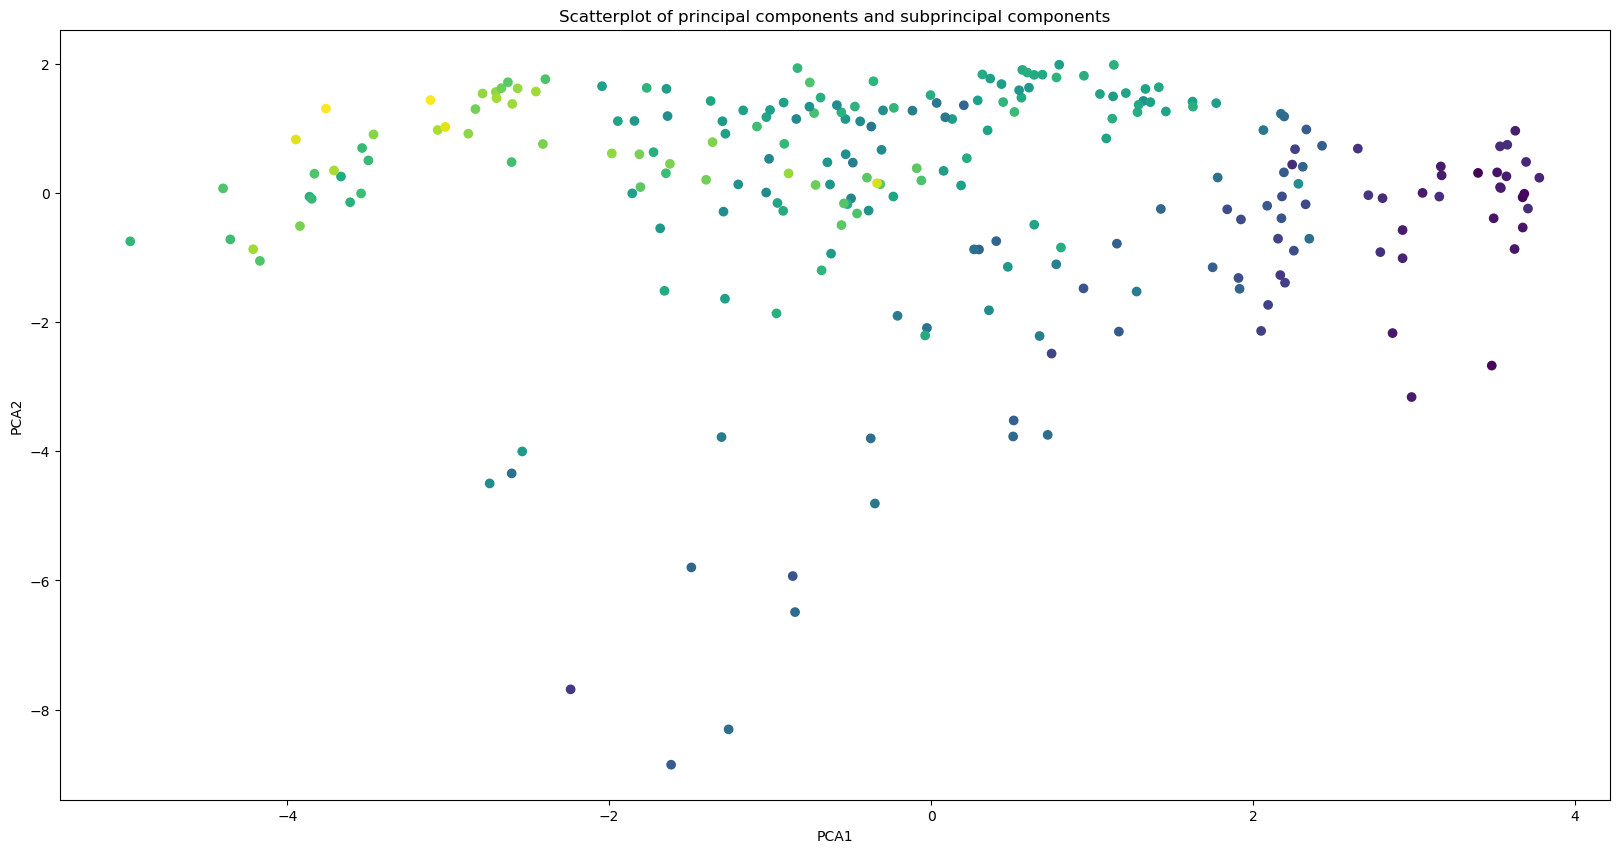

In [7]:
plt.figure(figsize=(20, 10))
plt.scatter(all_pca_data1.iloc[:,0], all_pca_data1.iloc[:,1], c=scaled_data1.iloc[:,0].values)
plt.title('Scatterplot of principal components and subprincipal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

#### 8) Calculate the covariance matrix of all the above variables and their lagged terms with the principal components

In [8]:
cov_data = scaled_data1.join(pca1_data1)
cov_matrix = pd.DataFrame(np.cov(cov_data.T))
cov_matrix.columns = cov_data.columns
cov_matrix.index =cov_data.columns
cov_matrix

,DCEF,RIPO,NIPO,NA,TURN,CCI,DCEF_lagged,RIPO_lagged,NIPO_lagged,NA_lagged,TURN_lagged,CCI_lagged,PCA1
DCEF,1.004274,0.029272,0.576854,0.106403,-0.153374,0.556376,0.967692,0.042837,0.567223,0.104334,-0.120920,0.569765,-1.632976
RIPO,0.029272,1.004274,0.185005,0.424812,0.184189,0.102675,0.020446,0.488348,0.163879,0.387183,0.199749,0.108187,-0.665870
NIPO,0.576854,0.185005,1.004274,0.255975,0.038625,0.477072,0.558882,0.206667,0.776292,0.228597,0.047725,0.493705,-1.635442
NA,0.106403,0.424812,0.255975,1.004274,0.621244,0.118991,0.118232,0.361291,0.203896,0.817315,0.556460,0.124444,-0.953498
TURN,-0.153374,0.184189,0.038625,0.621244,1.004274,-0.075876,-0.147504,0.106618,0.027976,0.483969,0.805444,-0.072412,-0.268176
CCI,0.556376,0.102675,0.477072,0.118991,-0.075876,1.004274,0.544928,0.087768,0.488966,0.114367,-0.078405,0.967126,-1.580628
DCEF_lagged,0.967692,0.020446,0.558882,0.118232,-0.147504,0.544928,1.004274,0.033174,0.571880,0.105768,-0.155240,0.570156,-1.621677
RIPO_lagged,0.042837,0.488348,0.206667,0.361291,0.106618,0.087768,0.033174,1.004274,0.186546,0.422635,0.183392,0.098707,-0.672091
NIPO_lagged,0.567223,0.163879,0.776292,0.203896,0.027976,0.488966,0.571880,0.186546,1.004274,0.259005,0.039925,0.489737,-1.626689
NA_lagged,0.104334,0.387183,0.228597,0.817315,0.483969,0.114367,0.105768,0.422635,0.259005,1.004274,0.621843,0.121302,-0.955678


#### 9) Calculate the correlation coefficients of all the above variables and their lagged terms with the principal components

In [9]:
corr = pd.DataFrame(index = data1.T.index)
corr['Corr_PCA1'] = np.nan
for i in range(len(data1.columns)):
    corr['Corr_PCA1'].iloc[i] = scaled_data1.iloc[:,i].corr(pca1_data1.iloc[:,0])
corr

,Corr_PCA1
DCEF,-0.784748
RIPO,-0.319992
NIPO,-0.785934
NA,-0.458216
TURN,-0.128875
CCI,-0.759592
DCEF_lagged,-0.779319
RIPO_lagged,-0.322982
NIPO_lagged,-0.781727
NA_lagged,-0.459264


#### 10) Between screening variables or one of the lagged terms of a variable, the higher is chosen by their correlation coefficients with the principal components

In [10]:
scaled_data2 = pd.DataFrame(index=data1.index)
for i in range(len(data.columns)):
    if (corr.iloc[i][0] > corr.iloc[i + len(data.columns)][0]):
        scaled_data2 = scaled_data2.merge(pd.DataFrame(scaled_data1.iloc[:,i]), left_index=True, right_index=True)
    else:
        scaled_data2 = scaled_data2.merge(pd.DataFrame(scaled_data1.iloc[:,i + len(data.columns)]), left_index=True, right_index=True)

scaled_data2   #The dataset that will be used for the final principal component analysis modelling

,DCEF_lagged,RIPO,NIPO_lagged,NA,TURN,CCI
SgnMonth,,,,,,
2003-01-01,0.370255,0.400989,-0.727492,-0.858832,-0.517872,-0.655334
2003-02-01,0.370255,0.202869,-0.727492,-0.885143,-0.997579,-0.646134
2003-03-01,0.568668,0.077495,-0.857747,-0.875511,-1.085525,-0.664534
2003-04-01,0.052343,0.809621,-0.662364,-0.818426,0.496707,-1.483310
2003-05-01,-0.503440,0.630307,-0.727492,-0.853194,-0.014180,-1.759302
...,...,...,...,...,...,...
2022-03-01,2.146957,-0.439746,0.054042,0.850431,0.126534,0.770624
2022-04-01,1.988001,-0.797062,1.356599,0.031977,-0.040564,-1.667305
2022-05-01,1.468293,-0.254017,1.291471,-0.010308,-0.126911,-1.658105


#### 11) Establishing a preliminary principal component analysis

In [11]:
all_pca_data2, pca_component2 = pca(scaled_data2.values, len(scaled_data2.columns))
all_pca_data2 = pd.DataFrame(all_pca_data2*(-1))
pca_component2 = pca_component2*(-1)
pca1_data2 = pd.DataFrame(all_pca_data2[0].tolist())   #Principal Component Analysis 1
pca1_data2.index = data.index
pca1_data2.columns = ['PCA1']
pca1_data2

,PCA1
SgnMonth,
2003-01-01,-0.802923
2003-02-01,-0.932288
2003-03-01,-0.955967
2003-04-01,-1.057845
2003-05-01,-1.641098
...,...
2022-03-01,1.679749
2022-04-01,0.685815
2022-05-01,0.516661


#### 12) Final coefficients for each variable in the investor sentiment (standardised) indicator

In [12]:
result = []
for i in range(len(pca_component2)):
    result.append(pca_component2[i][0])
result = pd.DataFrame(result).T
result.columns = scaled_data2.columns
result.index = ["Coef"]
result

,DCEF_lagged,RIPO,NIPO_lagged,NA,TURN,CCI
Coef,0.497423,0.271843,0.535708,0.359118,0.147121,0.490998


#### 13) Scatterplotting the data after screening the variables for principal components and subprincipal components

Text(0, 0.5, 'PCA2')

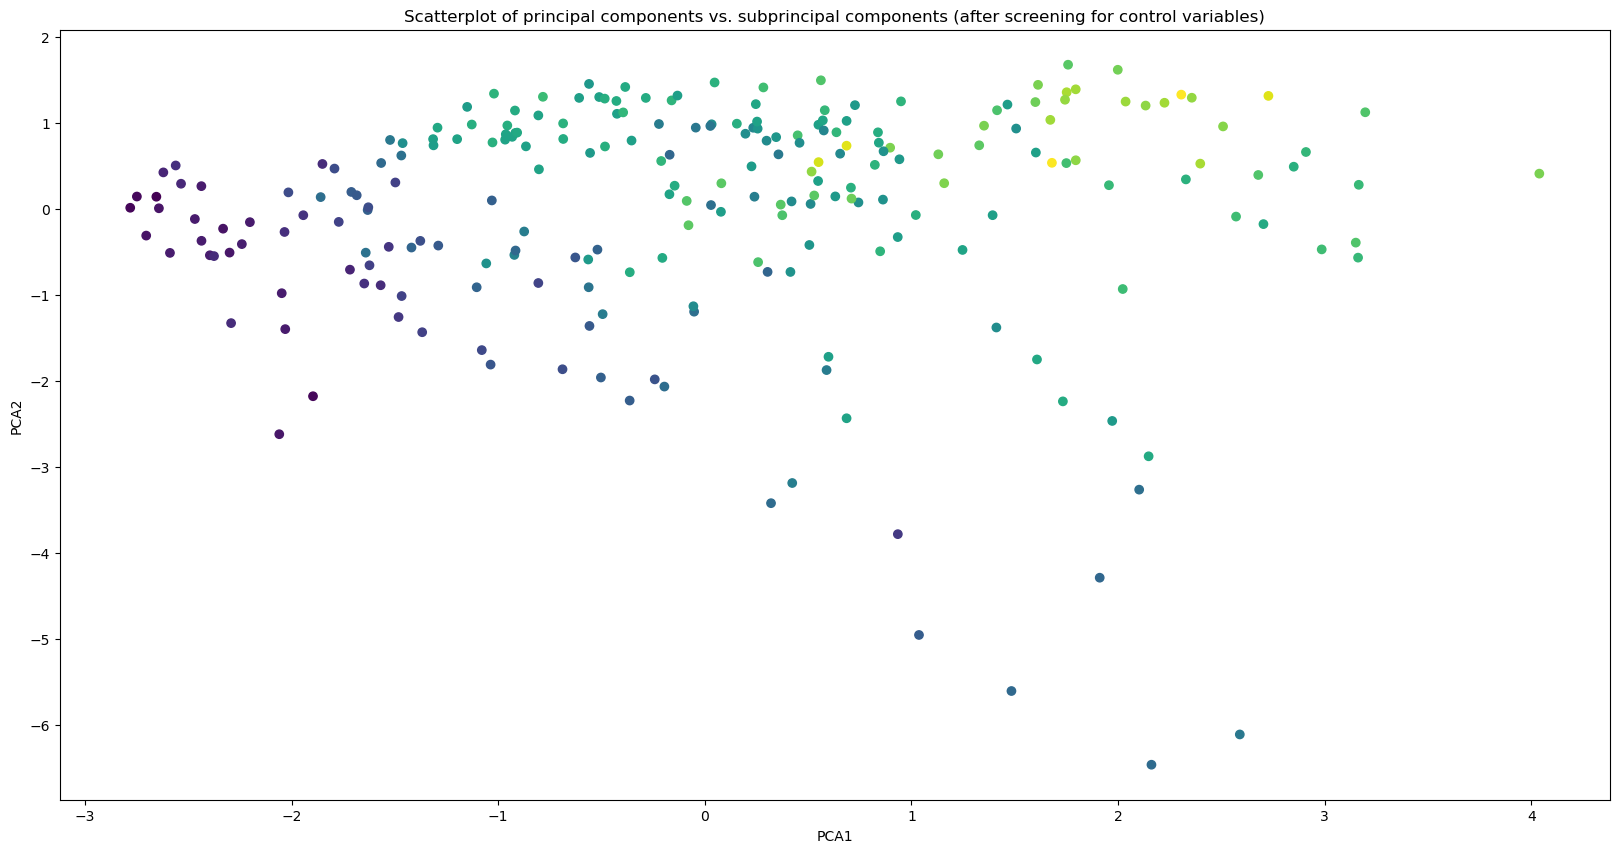

In [13]:
plt.figure(figsize=(20, 10))
plt.scatter(all_pca_data2.iloc[:,0], all_pca_data2.iloc[:,1], c=scaled_data2.iloc[:,0].values)
plt.title('Scatterplot of principal components vs. subprincipal components (after screening for control variables)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

#### 14) Calculation of investor sentiment indicators (after standardisation)

In [14]:
sentiment = pd.DataFrame(index = data.index)
proxy = pd.DataFrame(index = scaled_data2.index)
for i in range(len(all_pca_data2.values[0])):
        proxy['proxy_'+str(i)] = scaled_data2[scaled_data2.columns[i]]*result.values[0][i]

sentiment['Stdized_ISI'] = proxy.sum(axis=1)
sentiment

,Stdized_ISI
SgnMonth,
2003-01-01,-0.802923
2003-02-01,-0.932288
2003-03-01,-0.955967
2003-04-01,-1.057845
2003-05-01,-1.641098
...,...
2022-03-01,1.679749
2022-04-01,0.685815
2022-05-01,0.516661


#### 15) Plot the estimated investor sentiment indicator against the (standardised) investor sentiment indicator in the data source

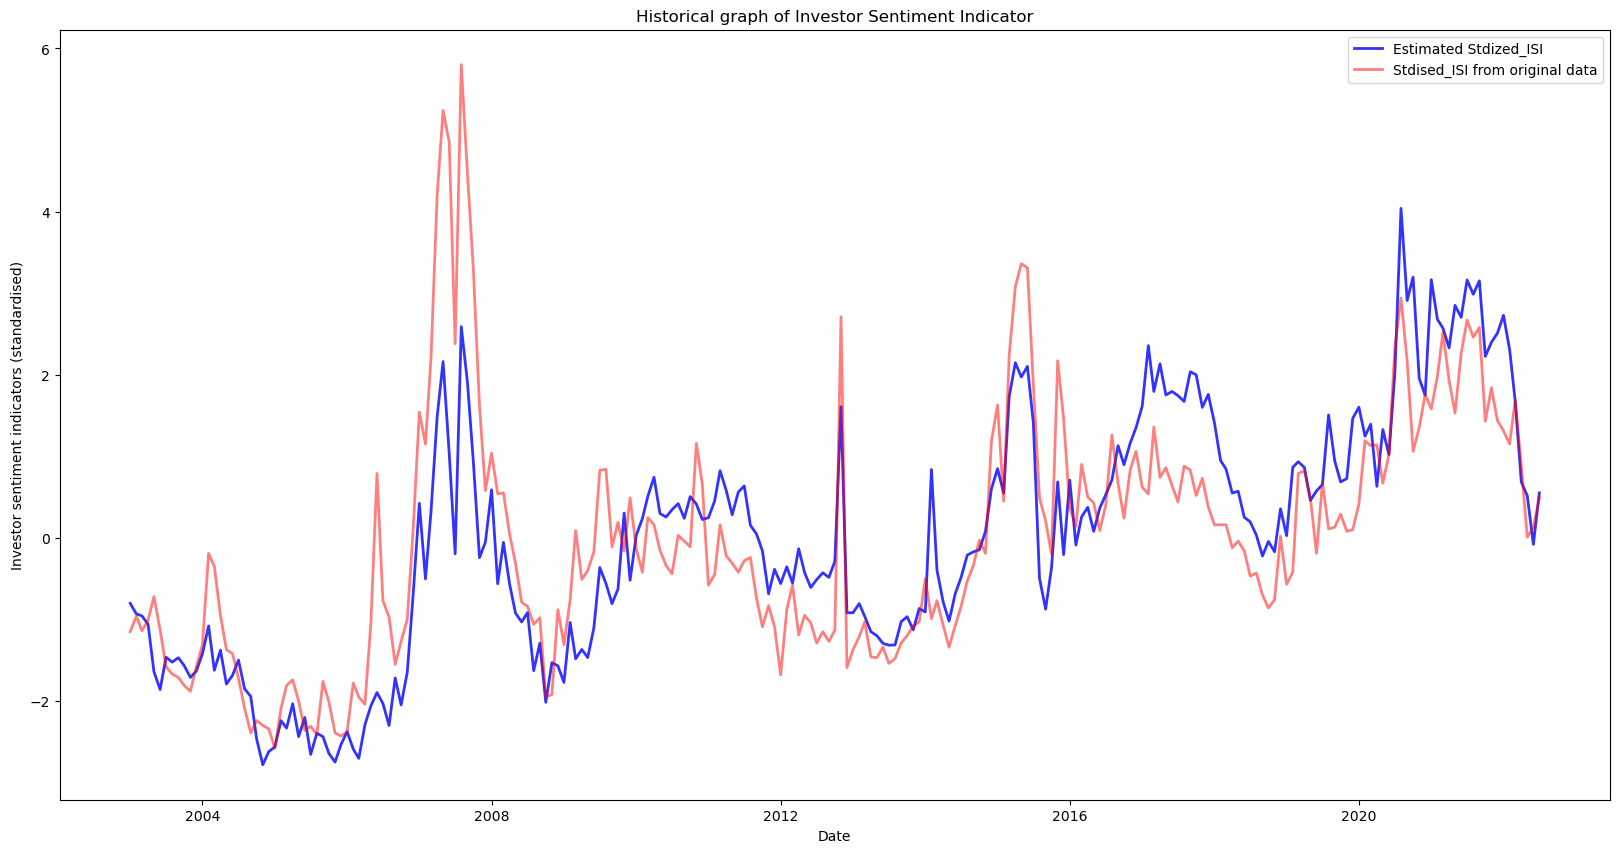

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(sentiment, linewidth = 2, color = 'blue', alpha = 0.8, label = 'Estimated Stdized_ISI')
plt.plot(df['StdISI'], linewidth = 2, color = 'red', alpha = 0.5, label = 'Stdised_ISI from original data')
plt.title('Historical graph of Investor Sentiment Indicator')
plt.xlabel('Date')
plt.ylabel('Investor sentiment indicators (standardised)')
plt.legend()
plt.show()